In [2]:
import tensorflow as tf 

In [11]:
import os
import cv2
import random
import shutil
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image

ImportError: cannot import name '_get_nan' from 'scipy._lib._util' (/Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/_lib/_util.py)

In [4]:
train_dir = '/Users/jinmolee/Downloads/archive (3)/dog vs cat/dataset/training_set'
test_dir = '/Users/jinmolee/Downloads/archive (3)/dog vs cat/dataset/test_set'

In [5]:
classes = os.listdir(train_dir)
classes = classes[0:2]
classes

['dogs', 'cats']

In [6]:
resize_size = 256
crop_size = 224

def preprocess_image(image):
    image = tf.image.resize(image, [resize_size, resize_size], method=tf.image.ResizeMethod.BILINEAR)
    image = tf.image.central_crop(image, central_fraction=crop_size / resize_size)
    image = tf.math.divide(image, 255.0)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = (image - mean) / std

    return image

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = []
y = []
for i in classes:
    folderPath = os.path.join(train_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = preprocess_image(img)
        X.append(img)
        y.append(i)
X = np.array(X)
y = np.array(y)
y = tf.keras.utils.to_categorical([classes.index(label) for label in y])

ImportError: dlopen(/Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/_iterative.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib
  Referenced from: <E6989187-D3E8-3103-BF0F-DABB04B74846> /Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/_iterative.cpython-39-darwin.so
  Reason: tried: '/Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/../../../../../../liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/../../../../../../liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/lib/liblapack.3.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jinmolee/tion/envs/tensorflow/lib/liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/bin/../lib/liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/lib/liblapack.3.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jinmolee/tion/envs/tensorflow/lib/liblapack.3.dylib' (no such file), '/Users/jinmolee/tion/envs/tensorflow/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)

In [6]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.2,random_state=42)

In [7]:
X_test = []
y_test = []
for i in classes:
    folderPath = os.path.join(test_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = preprocess_image(img)
        X_test.append(img)
        y_test.append(i)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = tf.keras.utils.to_categorical([classes.index(label) for label in y_test])

100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 160.21it/s]


In [8]:
def plot_acc_model(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    plt.show()
    
def plot_loss_model(loss, val_loss, epochs):
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [10]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [11]:
x = Flatten()(base_model.output)
output = Dense(2, activation='softmax')(x)

In [12]:
model_vgg16 = Model(inputs=base_model.input, outputs=output)
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
history = model_vgg16.fit(X_train, y_train,
                          epochs=10,
                          validation_data=(X_val, y_val),
                          verbose=1,
                          callbacks=[early_stopping])

Epoch 1/10


2023-10-30 18:39:50.592939: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


200/200 [==============================] - 72s 338ms/step - loss: 0.2364 - accuracy: 0.9072 - val_loss: 0.1383 - val_accuracy: 0.9475
Epoch 2/10
200/200 [==============================] - 69s 343ms/step - loss: 0.1018 - accuracy: 0.9686 - val_loss: 0.1011 - val_accuracy: 0.9625
Epoch 3/10
200/200 [==============================] - 68s 340ms/step - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0881 - val_accuracy: 0.9663
Epoch 4/10
200/200 [==============================] - 69s 346ms/step - loss: 0.0707 - accuracy: 0.9759 - val_loss: 0.0828 - val_accuracy: 0.9681
Epoch 5/10
200/200 [==============================] - 68s 339ms/step - loss: 0.0624 - accuracy: 0.9820 - val_loss: 0.0778 - val_accuracy: 0.9694
Epoch 6/10
200/200 [==============================] - 69s 345ms/step - loss: 0.0561 - accuracy: 0.9834 - val_loss: 0.0767 - val_accuracy: 0.9706
Epoch 7/10
200/200 [==============================] - 67s 337ms/step - loss: 0.0518 - accuracy: 0.9853 - val_loss: 0.0912 - val_accuracy: 0.9

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

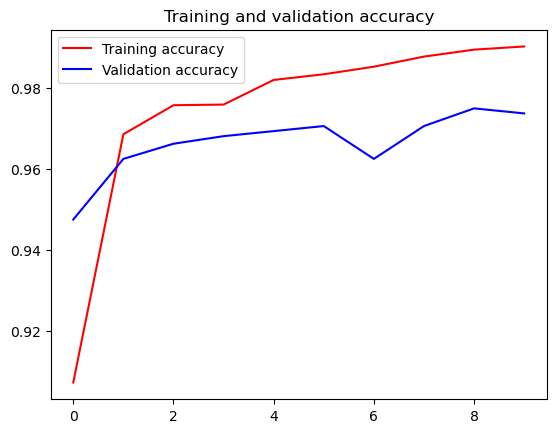

<Figure size 640x480 with 0 Axes>

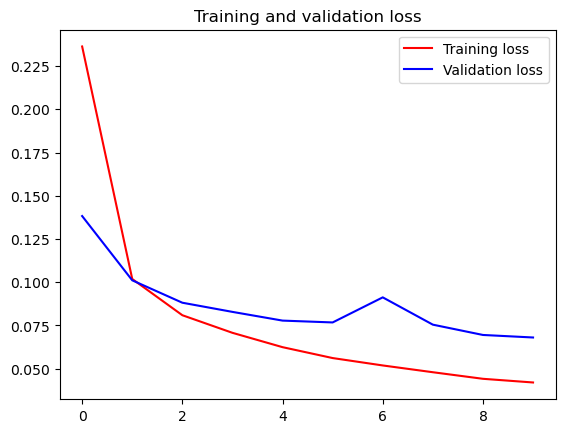

<Figure size 640x480 with 0 Axes>

In [16]:
plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)

In [17]:
y_pred = model_vgg16.predict(X_test)

63/63 [==============================] - 17s 266ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


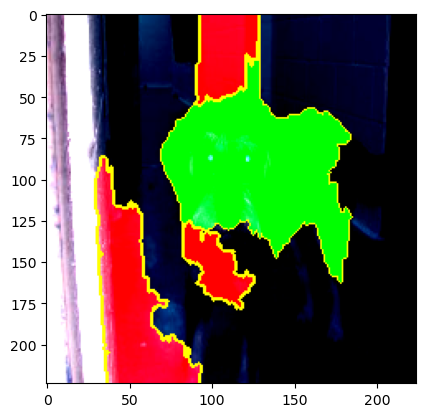

In [18]:
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt

explainer = LimeImageExplainer()
image_to_explain = X_test[1]
explanation = explainer.explain_instance(X_test[0].astype('double'), model_vgg16.predict, top_labels=1, hide_color=0, num_samples=1000)

from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

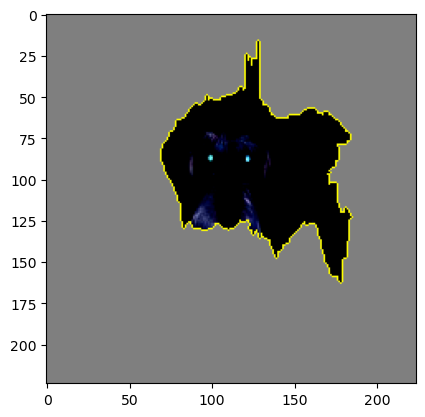

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

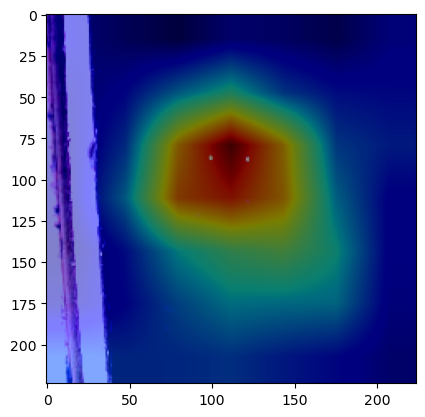

In [20]:
import cv2
import numpy as np

def grad_cam(model, image, layer_name):
    grad_model = Model(model.inputs, [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, np.argmax(predictions[0])]
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    gate = tf.maximum(grads, 0)
    guided_grads = gate * output
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)
    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

layer_name = 'block5_pool'
image_to_explain = X_test[0]
image_to_explain = np.expand_dims(image_to_explain, axis=0)
cam = grad_cam(model_vgg16, image_to_explain, layer_name)

plt.imshow(image_to_explain[0])
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.show()

/Users/sunyoung-park/miniforge3/envs/tf_gpu/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/sunyoung-park/miniforge3/envs/tf_gpu/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|████████                        | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|██████████████████      | 3/4 [00:18<00:04,  4.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|████████████████████████| 4/4 [00:27<00:00,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 5it [00:37,  9.36s/it]                                     


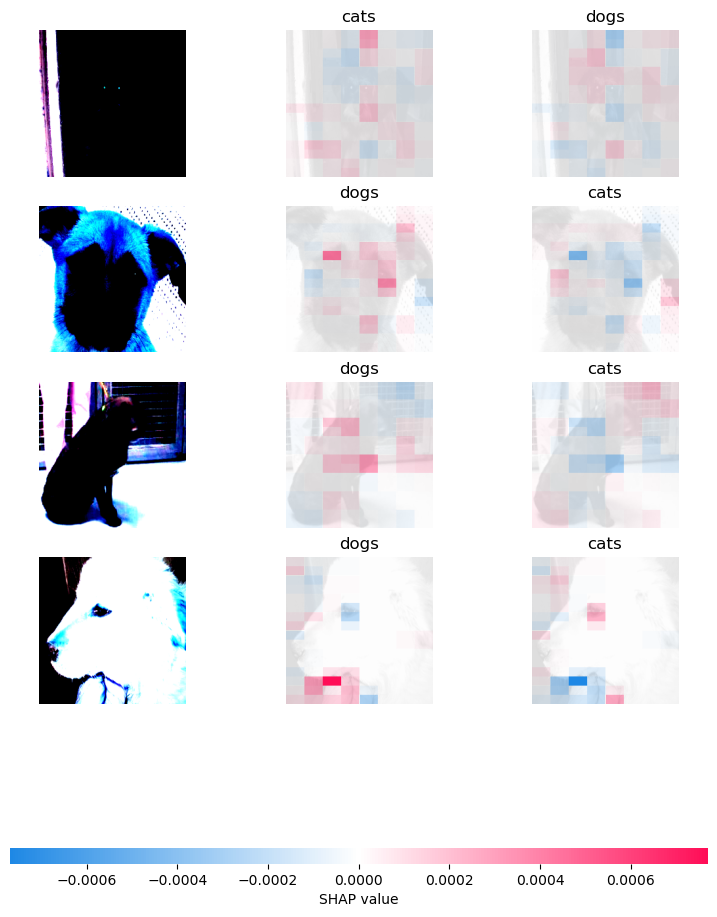

In [21]:
import shap

shap.initjs()
masker = shap.maskers.Image("inpaint_telea", X_test[0].shape)
explainer = shap.Explainer(model_vgg16, masker, output_names=classes)
explainer
shap_values = explainer(X_test[:4], outputs=shap.Explanation.argsort.flip[:5])
shap_values.shape
shap.image_plot(shap_values)